### Checkpoints for hubNashville project:
- a.  Thursday afternoon (checkpoint 1): what questions would teams like to answer (we'll create assignment repository at this point)
- b.  Monday afternoon (checkpoint 2): preliminary findings/what to focus on to add to presentation
- c.  Tuesday afternoon (final checkpoint): presentation walkthrough

#### TEAM CHEETAH (AMANDA AND PAM)
- Look at differences (who is calling and why, % of calls) between requests online (website and app) and phone calls.

- Identify differences (time of day/month/year, location, request type, etc.) to focus marketing to direct more users - to online platforms

- Are there certain types that lend themselves to reporting through phone, use this as an opportunity to improve or modify online experience for these request types

#### ORIGINAL LIST OF IDEAS
- `Date/Time` columns need to change to date/time? - mike did this, plus date difference column
- Change `Mapped Location` to geo point
- `Council District` needs to change to integer
- Do we need to keep the nulls? - mike got rid of nulls in certain fields
- May need to split date/time, do we need to keep time?
- What time of day are most requests opened/closed?
- What month has the most requests opened/closed?
- How long Open requests have been open, how long have the In Progress have been in progress?
- Which cities or zips generate the most requests? (make a map with popup showing type of request)
- How many requests were `closed when created`? QUICK REQUESTS
- What types of questions come in from the mayor's office as opposed to another `request origin`?
- Resident calls (much more) vs. business calls
- Would it be beneficial to find out what the "Other" is for `Contact Type`? Might be able to add more specific types.
- Explore parent requests and see if related to # of child requests or other metric (time taken to close).
- Types of request that are most called on (trash) - find keywords to break "other" down
- for subrequest = quick, request type = quick, no further info -- we recommend use of categories for better description
- ** to help move folks to online platforms, look at areas and types that are not currently on online platform -- don't look at hub and mobile app, and see what types of requests, who is calling and why, % of calls
- Question - Appendix A of the PDF only shows 5 status types, but the value counts shows 10 types.  Do we want to drop the types that are not listed on the Appendix?

In [1]:
from shapely.geometry import Point
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [153]:
servreq = pd.read_csv('../data/hubNashville__311__Service_Requests.csv', low_memory=False)
print(servreq.shape)
servreq.head()
servreq.dtypes

(348671, 21)


Request #                       int64
Status                         object
Request Type                   object
Subrequest Type                object
Additional Subrequest Type     object
Date / Time Opened             object
Date / Time Closed             object
Request Origin                 object
System of Origin ID            object
Contact Type                   object
Preferred Language            float64
State Issue                      bool
Parent Request                float64
Closed When Created              bool
Address                        object
City                           object
Council District              float64
ZIP                            object
Latitude                      float64
Longitude                     float64
Mapped Location                object
dtype: object

In [152]:
servreq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348671 entries, 0 to 348670
Data columns (total 28 columns):
Request #                     348671 non-null int64
Status                        348671 non-null object
Request Type                  348603 non-null object
Subrequest Type               338024 non-null object
Additional Subrequest Type    180510 non-null object
Date / Time Opened            348671 non-null datetime64[ns]
Date / Time Closed            338424 non-null datetime64[ns]
time_taken                    338424 non-null timedelta64[ns]
Request Origin                348671 non-null object
System of Origin ID           26398 non-null object
Contact Type                  26129 non-null object
Preferred Language            0 non-null float64
State Issue                   348671 non-null bool
Parent Request                3589 non-null float64
Closed When Created           348671 non-null bool
Address                       285058 non-null object
City                        

In [154]:
servreq.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,113016,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,10/30/2018 01:47:00 PM,03/05/2019 09:35:00 PM,Phone,NaN,NaN,...,False,NaN,False,2009 Upland Dr,NASHVILLE,7.0,37216,36.198638,-86.706659,"(36.1986378, -86.7066586)"
1,126185,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,NaN,12/28/2018 01:04:00 PM,12/28/2018 01:04:00 PM,Phone,OE-00040610_12/27/2018 15:44,NaN,...,False,NaN,True,ELM HILL PKE / DONELSON PKE,NASHVILLE,15.0,37214,36.148809,-86.666282,"(36.14880891, -86.6662816)"
2,119344,Closed,"Trash, Recycling & Litter",Damage to Property,Trash Service,11/27/2018 02:20:00 PM,11/29/2018 04:04:00 AM,Phone,NaN,NaN,...,False,NaN,True,"597 Westchester Dr, Nashville, TN 37115, Unite...",MADISON,8.0,37115,36.263020,-86.738630,"(36.26302, -86.73863)"
3,127752,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Recycle,01/03/2019 06:57:00 PM,01/09/2019 10:09:00 AM,Phone,NaN,NaN,...,False,NaN,False,Ruffian Way,NaN,NaN,NaN,38.097609,-84.554097,"(38.0976091, -84.5540971)"
4,113477,Closed,"Trash, Recycling & Litter",Backdoor Trash or Recycle Waivers,Request Recycling Disability Waiver,10/31/2018 12:20:00 PM,10/31/2018 04:10:00 PM,Phone,NaN,NaN,...,False,NaN,True,"2326 Smith Springs Rd, Nashville, TN 37217, Un...",NASHVILLE,29.0,37217,36.096460,-86.637440,"(36.09646, -86.63744)"


In [181]:
req_online = servreq[servreq['Request Origin'].isin(['Mobile App', 'hubNashville Community'])]
req_online.head(5)

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
5,127499,Closed,"Streets, Roads & Sidewalks",Request New Signal,NaN,01/03/2019 07:39:00 AM,01/22/2019 09:01:00 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,Blue Hole Rd & Antioch Pike,ANTIOCH,32.0,37013,36.059970,-86.672119,"(36.05997021, -86.6721194)"
6,128356,Closed,"Trash, Recycling & Litter",Cart Service,Recycling - Request an Additional Cart,01/05/2019 03:30:00 AM,01/17/2019 10:00:00 AM,hubNashville Community,NaN,NaN,...,False,NaN,False,1513A Wendell Ave,NASHVILLE,7.0,37206,36.193906,-86.710023,"(36.1939065, -86.7100229)"
15,114597,Closed,"Streets, Roads & Sidewalks",Roadwork Complaint,NaN,11/05/2018 04:38:00 PM,11/20/2018 11:13:00 AM,hubNashville Community,NaN,NaN,...,False,NaN,True,"20 Music Cir E, Nashville, TN 37203, United St...",NASHVILLE,19.0,37203,36.151670,-86.789510,"(36.15167, -86.78951)"
22,323738,Closed,Other,Mayor's Office Case,NaN,03/10/2020 05:07:20 AM,03/11/2020 07:41:37 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,127348,Closed,Property Violations,Junk and Debris,NaN,01/02/2019 07:43:00 PM,03/12/2019 08:03:00 AM,hubNashville Community,NaN,NaN,...,False,123149.0,False,5128 Hilson Rd,NASHVILLE,27.0,37211,36.053315,-86.727140,"(36.05331531, -86.72714015)"


In [184]:
servreq_counts = servreq.groupby(['Council District', 'Request Origin']).size().to_frame().reset_index()
servreq_counts.head(10)

,Council District,Request Origin,0
0,1.0,Email,21
1,1.0,Mayor's Office,18
2,1.0,Mobile App,111
3,1.0,Phone,5780
4,1.0,Walk-In,1
5,1.0,hubNashville Community,1175
6,2.0,Council Member,1
7,2.0,Council's Website,1
8,2.0,Email,50
9,2.0,Mayor's Office,11


## Looking at value counts of Request Origin column

In [7]:
print(servreq['Request Origin'].value_counts())
print(type(servreq['Request Origin']))

Phone                     244656
hubNashville Community     88649
Mobile App                 13051
Email                       1721
Mayor's Office               372
Council Member               129
Council's Website             50
Walk-In                       18
Mayor's Website                8
In Person at Event             6
Social Media                   5
USPS Letter                    5
OEM Case                       1
Name: Request Origin, dtype: int64
<class 'pandas.core.series.Series'>


In [6]:
print(servreq['Status'].value_counts())
print(type(servreq['Status']))

Closed         338421
In Progress      6510
New              2509
Assigned          894
Transferred       315
On Hold            17
Denied              2
In Process          1
Escalated           1
Completed           1
Name: Status, dtype: int64
<class 'pandas.core.series.Series'>


In [112]:
request_percents = servreq['Request Origin'].value_counts(normalize=True).to_frame().reset_index()
request_percents.columns = ['Request Origin Type', 'Percent of Total Requests']
request_percents

,Request Origin Type,Percent of Total Requests
0,Phone,0.701682
1,hubNashville Community,0.254248
2,Mobile App,0.037431
3,Email,0.004936
4,Mayor's Office,0.001067
5,Council Member,0.000370
6,Council's Website,0.000143
7,Walk-In,0.000052
8,Mayor's Website,0.000023
9,In Person at Event,0.000017


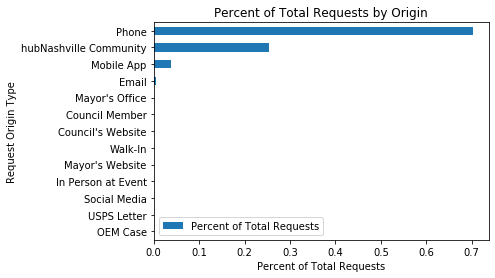

In [135]:
request_percents.plot(x='Request Origin Type',
                      y='Percent of Total Requests',
                      kind='barh')
plt.gca().invert_yaxis()
plt.title('Percent of Total Requests by Origin')
plt.xlabel('Percent of Total Requests')
plt.ylabel('Request Origin Type');
plt.show()

In [144]:
subset_app_hub_reqs = servreq.query('Request Origin == ['Mobile App','hubNashville Community'])
subset_app_hub_reqs

SyntaxError: invalid syntax (<ipython-input-144-48b975badd6a>, line 1)

In [8]:
print(servreq['Request Type'].value_counts())
print(type(servreq['Request Type']))

Trash, Recycling & Litter     145146
Streets, Roads & Sidewalks     84830
Quick Requests                 64659
Property Violations            20651
Public Safety                   9733
COVID-19                        5246
Other                           4814
Electric & Water General        4354
Transit                         3692
Hands On Volunteers             2637
Permits                         1322
Parks                           1070
Planning & Zoning                250
Storm Relief                     167
Education & Libraries             22
Workforce & Jobs                   8
Public Records Request             2
Name: Request Type, dtype: int64
<class 'pandas.core.series.Series'>


In [9]:
print(servreq['Subrequest Type'].value_counts())
print(type(servreq['Subrequest Type']))

Quick Requests                          54141
Cart Service                            38339
Missed Pickup - Trash Cart Service      26338
Missed Pickup - Recycle Cart Service    19381
File a Trash or Recycling Complaint     16511
                                        ...  
Music City Star                             1
Downtown Circulator                         1
Opportunity Now                             1
Remove Debris                               1
Head Start                                  1
Name: Subrequest Type, Length: 185, dtype: int64
<class 'pandas.core.series.Series'>


## Looking at value counts of Contact Type column

In [10]:
print(servreq['Contact Type'].value_counts())
print(type(servreq['Contact Type']))

Resident    23834
Business     1257
Other        1038
Name: Contact Type, dtype: int64
<class 'pandas.core.series.Series'>


#### Contact Type=Other seems to be mostly Request Type of Streets/Roads/Sidewalks.  Not sure what "other" is, but not listed as resident or business

In [11]:
contact_other = servreq.loc[servreq['Contact Type'] == "Other"]
contact_other.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
465,126066,Closed,"Streets, Roads & Sidewalks",Traffic Engineering,Intersection Review,12/27/2018 08:14:00 PM,04/16/2019 04:35:00 PM,Phone,NaN,Other,...,False,NaN,False,Harding Pl & Estes Rd,NASHVILLE,34.0,37215,36.092755,-86.839782,"(36.0927552, -86.839782)"
723,115049,Closed,"Streets, Roads & Sidewalks",Traffic Engineering,Intersection Review,11/07/2018 04:01:00 PM,04/08/2019 04:21:00 PM,Phone,NaN,Other,...,False,NaN,False,Tyler Dr & Andrew Jackson Pkwy,HERMITAGE,12.0,37076,36.197370,-86.608543,"(36.19737, -86.6085432)"
1294,124651,Closed,"Streets, Roads & Sidewalks",Dead Animal Pickup,NaN,12/19/2018 06:41:00 PM,12/20/2018 10:02:00 AM,Phone,NaN,Other,...,False,NaN,False,1100 Fort Negley Blvd,NASHVILLE,17.0,37203,36.143240,-86.775130,"(36.14324, -86.77513)"
1370,113464,Closed,Public Safety,Abandoned Vehicles,NaN,10/31/2018 12:02:00 PM,10/31/2018 01:11:00 PM,Phone,NaN,Other,...,False,NaN,True,"Hayes St, Nashville, TN 37203, United States",NASHVILLE,21.0,37203,36.153460,-86.797900,"(36.15346, -86.7979)"
1844,119357,Closed,"Streets, Roads & Sidewalks",Illegal Parking or Blocking,Parking on Grassy Strips,11/27/2018 08:39:00 PM,12/13/2018 08:01:00 AM,Phone,NaN,Other,...,False,NaN,False,3608 Burwick Pl,ANTIOCH,33.0,37013,36.085190,-86.586210,"(36.08519, -86.58621)"


In [12]:
#use this query as example to subset
#mayor_req_types_df = mayors_office_calls.query([mayors_office_calls['Request Type'])

Convert date/time fields from object to date/time, then calculate how long a request has been open in a new column, and move the column up to be close to original date/time fields. (code from Mike)

In [13]:
t1 = pd.to_datetime(servreq['Date / Time Closed'])
t2 = pd.to_datetime(servreq['Date / Time Opened'])
servreq['time_taken'] = t1-t2

# move time_taken column to after time_closed

col_name = 'time_taken'
hub_time = servreq.pop(col_name)
servreq.insert(7, col_name, hub_time)
servreq.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,time_taken,Request Origin,System of Origin ID,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,113016,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,10/30/2018 01:47:00 PM,03/05/2019 09:35:00 PM,126 days 07:48:00,Phone,NaN,...,False,NaN,False,2009 Upland Dr,NASHVILLE,7.0,37216,36.198638,-86.706659,"(36.1986378, -86.7066586)"
1,126185,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,NaN,12/28/2018 01:04:00 PM,12/28/2018 01:04:00 PM,0 days 00:00:00,Phone,OE-00040610_12/27/2018 15:44,...,False,NaN,True,ELM HILL PKE / DONELSON PKE,NASHVILLE,15.0,37214,36.148809,-86.666282,"(36.14880891, -86.6662816)"
2,119344,Closed,"Trash, Recycling & Litter",Damage to Property,Trash Service,11/27/2018 02:20:00 PM,11/29/2018 04:04:00 AM,1 days 13:44:00,Phone,NaN,...,False,NaN,True,"597 Westchester Dr, Nashville, TN 37115, Unite...",MADISON,8.0,37115,36.263020,-86.738630,"(36.26302, -86.73863)"
3,127752,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Recycle,01/03/2019 06:57:00 PM,01/09/2019 10:09:00 AM,5 days 15:12:00,Phone,NaN,...,False,NaN,False,Ruffian Way,NaN,NaN,NaN,38.097609,-84.554097,"(38.0976091, -84.5540971)"
4,113477,Closed,"Trash, Recycling & Litter",Backdoor Trash or Recycle Waivers,Request Recycling Disability Waiver,10/31/2018 12:20:00 PM,10/31/2018 04:10:00 PM,0 days 03:50:00,Phone,NaN,...,False,NaN,True,"2326 Smith Springs Rd, Nashville, TN 37217, Un...",NASHVILLE,29.0,37217,36.096460,-86.637440,"(36.09646, -86.63744)"


Convert opened/closed columns back to datetime format

In [14]:
servreq["Date / Time Opened"]= pd.to_datetime(servreq["Date / Time Opened"])
servreq["Date / Time Closed"]= pd.to_datetime(servreq["Date / Time Closed"])
servreq.dtypes

Request #                               int64
Status                                 object
Request Type                           object
Subrequest Type                        object
Additional Subrequest Type             object
Date / Time Opened             datetime64[ns]
Date / Time Closed             datetime64[ns]
time_taken                    timedelta64[ns]
Request Origin                         object
System of Origin ID                    object
Contact Type                           object
Preferred Language                    float64
State Issue                              bool
Parent Request                        float64
Closed When Created                      bool
Address                                object
City                                   object
Council District                      float64
ZIP                                    object
Latitude                              float64
Longitude                             float64
Mapped Location                   

Break Date/Time Opened to separate year and month

In [15]:
servreq['date_open'] = pd.to_datetime(servreq['Date / Time Opened'])
servreq['year_open'], servreq['monthnum_open'] = servreq['Date / Time Opened'].dt.year,servreq['Date / Time Opened'].dt.month
servreq.head(1)

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,time_taken,Request Origin,System of Origin ID,...,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location,date_open,year_open,monthnum_open
0,113016,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,2018-10-30 13:47:00,2019-03-05 21:35:00,126 days 07:48:00,Phone,NaN,...,2009 Upland Dr,NASHVILLE,7.0,37216,36.198638,-86.706659,"(36.1986378, -86.7066586)",2018-10-30 13:47:00,2018,10


Break Date/Time Closed to separate year and month

In [16]:
servreq['date_closed'] = pd.to_datetime(servreq['Date / Time Closed'])
servreq['year_closed'], servreq['monthnum_closed'] = servreq['Date / Time Closed'].dt.year,servreq['Date / Time Closed'].dt.month
servreq.head(1)

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,time_taken,Request Origin,System of Origin ID,...,ZIP,Latitude,Longitude,Mapped Location,date_open,year_open,monthnum_open,date_closed,year_closed,monthnum_closed
0,113016,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,2018-10-30 13:47:00,2019-03-05 21:35:00,126 days 07:48:00,Phone,NaN,...,37216,36.198638,-86.706659,"(36.1986378, -86.7066586)",2018-10-30 13:47:00,2018,10,2019-03-05 21:35:00,2019.0,3.0


In [17]:
servreq['monthnum_open'].value_counts()

4     40369
3     39451
2     32691
5     32436
8     30159
1     29970
9     27839
10    26329
7     25419
6     22107
11    20998
12    20903
Name: monthnum_open, dtype: int64

In [18]:
servreq.sort_values(by = 'monthnum_open', ascending = True).head(1)

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,time_taken,Request Origin,System of Origin ID,...,ZIP,Latitude,Longitude,Mapped Location,date_open,year_open,monthnum_open,date_closed,year_closed,monthnum_closed
174335,288053,Closed,"Trash, Recycling & Litter",Missed Pickup - Dumpster Service,Trash,2020-01-03 21:09:00,2020-01-04 21:10:00,1 days 00:01:00,hubNashville Community,NaN,...,37013,36.073472,-86.690724,"(36.0734716, -86.690724)",2020-01-03 21:09:00,2020,1,2020-01-04 21:10:00,2020.0,1.0


### take a look at `Council District` info

In [19]:
servreq['Council District'].value_counts()

19.0    18781
21.0    15931
6.0     14541
17.0    13453
5.0     12846
24.0    11674
7.0     11331
20.0    11322
15.0    11011
2.0     10750
25.0    10295
16.0     9881
8.0      9558
33.0     8405
23.0     7858
29.0     7856
18.0     7808
1.0      7106
26.0     6721
28.0     6257
34.0     6066
30.0     5888
9.0      5845
3.0      5766
32.0     5508
27.0     5305
13.0     5154
31.0     4896
4.0      4598
14.0     4180
11.0     3745
12.0     2863
22.0     2628
35.0     2537
10.0     2210
Name: Council District, dtype: int64

In [31]:
median_district = servreq['Council District'].describe()
print(median_district)

count    280574.000000
mean         17.221286
std           9.517280
min           1.000000
25%           8.000000
50%          18.000000
75%          24.000000
max          35.000000
Name: Council District, dtype: float64


In [24]:
district_19 = servreq.loc[servreq['Council District'] == 19.0].head()
print(district_19.shape)
district_19.head()
# mask_2009 = gdp_and_internet_use_df['Year'] == 2009
# mask_2009_df = gdp_and_internet_use_df [mask_2009]
# print(mask_2009_df.head())

(5, 28)


,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,time_taken,Request Origin,System of Origin ID,...,ZIP,Latitude,Longitude,Mapped Location,date_open,year_open,monthnum_open,date_closed,year_closed,monthnum_closed
9,122346,Closed,"Trash, Recycling & Litter",Extra Cart Pickup Request,Extra Recycle Cart Pickup,2018-12-10 15:30:00,2018-12-13 10:04:00,2 days 18:34:00,Phone,NaN,...,37203,36.160679,-86.800181,"(36.1606792, -86.8001815)",2018-12-10 15:30:00,2018,12,2018-12-13 10:04:00,2018.0,12.0
15,114597,Closed,"Streets, Roads & Sidewalks",Roadwork Complaint,NaN,2018-11-05 16:38:00,2018-11-20 11:13:00,14 days 18:35:00,hubNashville Community,NaN,...,37203,36.151670,-86.789510,"(36.15167, -86.78951)",2018-11-05 16:38:00,2018,11,2018-11-20 11:13:00,2018.0,11.0
56,123776,Closed,"Streets, Roads & Sidewalks",Potholes,Roadway,2018-12-15 17:04:00,2018-12-19 17:04:00,4 days 00:00:00,hubNashville Community,NaN,...,37210,36.158254,-86.744010,"(36.15825449, -86.74401022)",2018-12-15 17:04:00,2018,12,2018-12-19 17:04:00,2018.0,12.0
66,113358,Closed,"Streets, Roads & Sidewalks",Obstruction of right of way,NaN,2018-10-31 08:30:00,2018-11-02 16:10:00,2 days 07:40:00,hubNashville Community,NaN,...,37203,36.148640,-86.787240,"(36.14864, -86.78724)",2018-10-31 08:30:00,2018,10,2018-11-02 16:10:00,2018.0,11.0
74,120630,Closed,"Streets, Roads & Sidewalks",Remove debris in roadway,Roadway,2018-12-03 09:42:00,2018-12-05 11:13:00,2 days 01:31:00,Phone,NaN,...,37208,36.169390,-86.796650,"(36.16939, -86.79665)",2018-12-03 09:42:00,2018,12,2018-12-05 11:13:00,2018.0,12.0


In [51]:
councildist_df = gpd.read_file('../data/councildist_df.geojson')
print(councildist_df.crs)
councildist_df.head()

{'init': 'epsg:4326'}


,first_name,email_address,business_phone_number,last_name,position,council_district,geometry
0,Jonathan B.,Jonathan.Hall@nashville.gov,615-432-1301,Hall,Council Member,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ..."
1,Kyonzté,Kyonzte.Toombs@nashville.gov,615-432-1302,Toombs,Council Member,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ..."
2,Jennifer,Jennifer.Gamble@nashville.gov,615-432-1303,Gamble,Council Member,3,"MULTIPOLYGON (((-86.76842 36.38358, -86.76824 ..."
3,Robert,Robert.Swope@nashville.gov,615-432-1304,Swope,Council Member,4,"MULTIPOLYGON (((-86.74489 36.05316, -86.74491 ..."
4,Sean,Sean.Parker@nashville.gov,615-432-1305,Parker,Council Member,5,"MULTIPOLYGON (((-86.74724 36.21041, -86.74243 ..."


In [53]:
councildist_df.crs = "EPSG:4326"
print(councildist_df.crs)
councildist_df.head()

EPSG:4326


,first_name,email_address,business_phone_number,last_name,position,council_district,geometry
0,Jonathan B.,Jonathan.Hall@nashville.gov,615-432-1301,Hall,Council Member,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ..."
1,Kyonzté,Kyonzte.Toombs@nashville.gov,615-432-1302,Toombs,Council Member,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ..."
2,Jennifer,Jennifer.Gamble@nashville.gov,615-432-1303,Gamble,Council Member,3,"MULTIPOLYGON (((-86.76842 36.38358, -86.76824 ..."
3,Robert,Robert.Swope@nashville.gov,615-432-1304,Swope,Council Member,4,"MULTIPOLYGON (((-86.74489 36.05316, -86.74491 ..."
4,Sean,Sean.Parker@nashville.gov,615-432-1305,Parker,Council Member,5,"MULTIPOLYGON (((-86.74724 36.21041, -86.74243 ..."


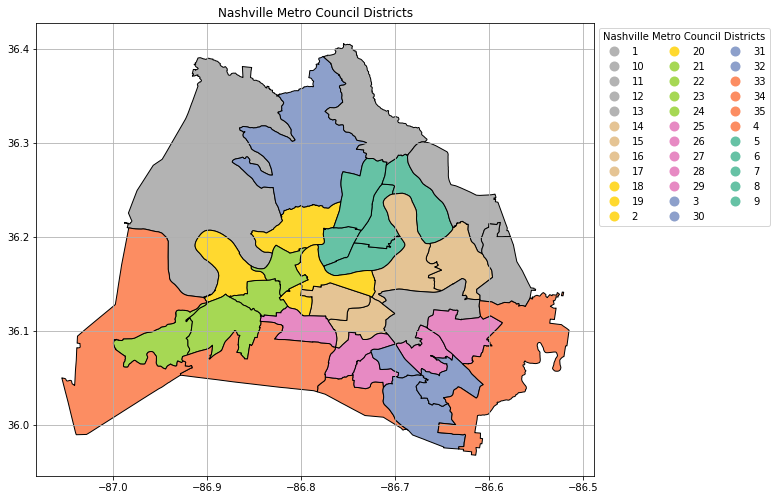

In [69]:
leg_kwds = {'title': 'Nashville Metro Council Districts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1), 'ncol': 3}

councildist_df.plot(column = 'council_district', figsize=(10, 10),
                edgecolor = 'black',
                legend = True, legend_kwds = leg_kwds,
                cmap = 'Set2_r')
plt.grid()
plt.title('Nashville Metro Council Districts')
plt.show()

In [70]:
councildist_df = councildist_df[['council_district', 'geometry']]

In [74]:
#councildist_df.head(1)

In [87]:
#subset_servreq_dist = servreq.query(servreq['Council District'] == (19.0, 18.0, 10.0), reset_index=True)
#subset_servreq_dist

ValueError: expr must be a string to be evaluated, <class 'pandas.core.series.Series'> given

In [49]:
# councildist_list = [19.0, 18.0, 10.0]
# medhilo_council_dist_df = servreq.query('"Council District" in @councildist_list').reset_index(drop=True)
# medhilo_council_dist_df = medhilo_council_dist_df.sort_values(['Request Type', 'time_taken'], ascending = True)
# medhilo_council_dist_df.head(15)

another subset idea:

In [ ]:
# councildist_list = ['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']
# top_5_council_dist_df = servreq.query("Country in @country_list").reset_index(drop=True)
# top_5_council_dist_df = top_5_council_dist_df.sort_values(['Request Type', 'time_taken'], ascending = True)
# top_5_council_dist_df.head(15)

#### (NOT PURSUING THIS LINE OF ANALYSIS CURRENTLY) Looking at Request Origin of Mayor's Office only

In [ ]:
mayors_office_calls = servreq.loc[servreq['Request Origin'] == "Mayor's Office"]
mayors_office_calls.head()
#mayors_office_calls.tail()

#### (NOT PURSUING THIS LINE OF ANALYSIS CURRENTLY) Found no open calls to mayor's office

In [ ]:
mayor_calls_open = mayors_office_calls.query('Status == False')
mayor_calls_open.head()

#### (NOT PURSUING THIS LINE OF ANALYSIS CURRENTLY) trying to pull list of what types of requests from mayors_office_calls

In [ ]:
mayors_office_calls['Request Type'].value_counts()

#### Nearly 25% of the Council District and City columns are Nan or empty 
### USE FILLNA to fill the nan/nulls with spaces:
df.column = df.column.fillna(' ')
### OR fix apostrophes or other string issues with:
df.column = df.column.str.replace("'", "`")


In [ ]:
map_nulls_cd = servreq['Council District'].isnull()
map_nulls_cd.value_counts()

In [ ]:
map_nulls_city = servreq['City'].isnull()
map_nulls_city.value_counts()
#map_nulls_city.head(10)